In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
df = pd.read_csv('team_performances_by_annotation.csv')

df

,team,post_count,positive_posts,negative_posts,neutral_posts,performance,time_since_creation_days
0,Betboom,24,5,3,16,0,490
1,Cloud9,14,4,0,10,0,3776
2,ECLOT,18,4,2,12,0,3133
3,FaZe Clan,11,4,1,6,1,3239
4,Fnatic,19,5,5,9,1,7437
5,GamerLegion,30,7,5,17,1,2075
6,Natus Vincere,21,5,1,15,1,5464
7,Nemiga,8,1,3,4,1,2737
8,Rebels,3,0,0,3,0,325
9,SAW,6,1,0,5,0,1797


C:\Users\dunca\AppData\Local\Temp\ipykernel_3540\2087443115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['performance'], y=df['post_count'], palette='bright', width=0.6)


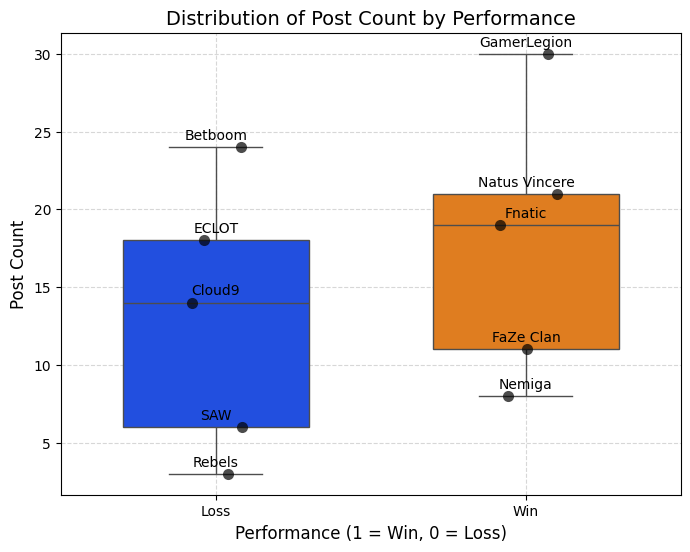

In [24]:
# Correlation Between Post Count and Performance
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['performance'], y=df['post_count'], palette='bright', width=0.6)
sns.stripplot(x=df['performance'], y=df['post_count'], color='black', size=8, jitter=True, alpha=0.7)

for i in range(df.shape[0]):
    x = df.loc[i, 'performance']
    y = df.loc[i, 'post_count']
    plt.text(x, y + 0.5, df.loc[i, 'team'], horizontalalignment='center', fontsize=10, color='black')

plt.title("Distribution of Post Count by Performance", fontsize=14)
plt.xlabel("Performance (1 = Win, 0 = Loss)", fontsize=12)
plt.ylabel("Post Count", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks([0, 1], labels=["Loss", "Win"])
plt.show()

In [30]:
correlation = np.corrcoef(df['post_count'], df['performance'])[0, 1]
print(f"Correlation between post_count and performance: {correlation}")
from scipy.stats import ttest_ind

adjusted_performance_ttest = ttest_ind(
    df.loc[df["performance"] == 1, "post_count"],  # Winners
    df.loc[df["performance"] == 0, "post_count"],  # Losers
    equal_var=False
)

print(f"T-Test P-Value for Adjusted Weighted Performance: {adjusted_performance_ttest.pvalue}")


Correlation between post_count and performance: 0.2962285791667875
T-Test P-Value for Adjusted Weighted Performance: 0.40593474222782655


### Conclusion

There is some correlation between post count and performance, but it is more likely that this just happened instead of being a true correlation.

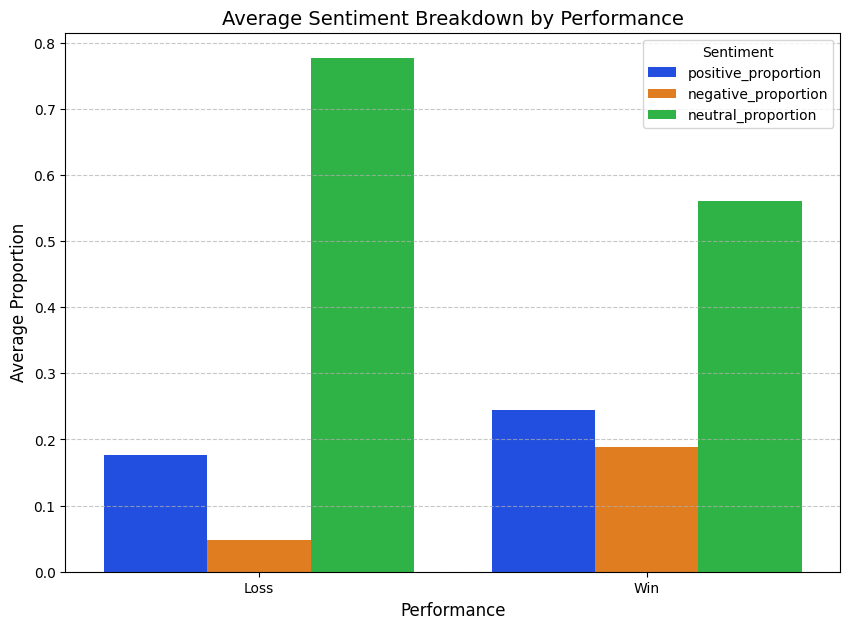

In [25]:
# Calculate sentiment proportions
df['positive_proportion'] = df['positive_posts'] / df['post_count']
df['negative_proportion'] = df['negative_posts'] / df['post_count']
df['neutral_proportion'] = df['neutral_posts'] / df['post_count']

# Group by performance to calculate average sentiment proportions
average_sentiments = df.groupby('performance')[
    ['positive_proportion', 'negative_proportion', 'neutral_proportion']
].mean().reset_index()

# Bar plot for average sentiment breakdown
average_sentiments_melted = average_sentiments.melt(id_vars='performance', var_name='Sentiment', value_name='Proportion')
plt.figure(figsize=(10, 7))
sns.barplot(data=average_sentiments_melted, x='performance', y='Proportion', hue='Sentiment', palette='bright')
plt.title("Average Sentiment Breakdown by Performance", fontsize=14)
plt.xlabel("Performance", fontsize=12)
plt.ylabel("Average Proportion", fontsize=12)
plt.legend(title='Sentiment', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([0, 1], labels=["Loss", "Win"])
plt.show()

In [ ]:
import json

sentiment_means = df.groupby('performance')[
    ['positive_proportion', 'negative_proportion', 'neutral_proportion']
].mean()

positive_diff = (
    sentiment_means.loc[1, "positive_proportion"] - sentiment_means.loc[0, "positive_proportion"]
)
negative_diff = (
    sentiment_means.loc[0, "negative_proportion"] - sentiment_means.loc[1, "negative_proportion"]
)


# Calculate sentiment ratios
df["sentiment_ratio"] = df["positive_proportion"] / (df["negative_proportion"] + 1e-5)

sentiment_ratio_means = df.groupby("performance")["sentiment_ratio"].mean()
sentiment_ratio_medians = df.groupby("performance")["sentiment_ratio"].median()

# Perform t-tests for statistical significance
positive_ttest = ttest_ind(
    df.loc[df["performance"] == 1, "positive_proportion"],
    df.loc[df["performance"] == 0, "positive_proportion"],
    equal_var=False
)
negative_ttest = ttest_ind(
    df.loc[df["performance"] == 1, "negative_proportion"],
    df.loc[df["performance"] == 0, "negative_proportion"],
    equal_var=False
)
neutral_ttest = ttest_ind(
    df.loc[df["performance"] == 1, "neutral_proportion"],
    df.loc[df["performance"] == 0, "neutral_proportion"],
    equal_var=False
)

# Display results
results = {
    "Positive Proportion Difference": positive_diff,
    "Negative Proportion Difference": negative_diff,
    "Mean Sentiment Ratio (Win)": sentiment_ratio_means[1],
    "Mean Sentiment Ratio (Loss)": sentiment_ratio_means[0],
    "Median Sentiment Ratio (Win)": sentiment_ratio_medians[1],
    "Median Sentiment Ratio (Loss)": sentiment_ratio_medians[0],
    "Positive Proportion T-Test p-value": positive_ttest.pvalue,
    "Negative Proportion T-Test p-value": negative_ttest.pvalue,
    "Neutral Proportion T-Test p-value": neutral_ttest.pvalue,
}
results_df = pd.DataFrame(results.items(), columns=["Metric", "Value"], index=None)

results_df

,Metric,Value
0,Positive Proportion Difference,0.068057
1,Negative Proportion Difference,-0.141448
2,Mean Sentiment Ratio (Win),2.346343
3,Mean Sentiment Ratio (Loss),9048.352318
4,Median Sentiment Ratio (Win),1.399916
5,Median Sentiment Ratio (Loss),1.999820
6,Positive Proportion T-Test p-value,0.301133
7,Negative Proportion T-Test p-value,0.077169
8,Neutral Proportion T-Test p-value,0.025554


# Conclusion

PPD: Not notable statistically

NPD: Approaching statistical significance suggesting negative sentiment may impact performance


MeanSRW: Winning teams have a dominace of 2.35 positive posts to negative posts, positive setniment dominates over negative sentiment

MeanSRL: Anomoly due to 0's from some teams in negative posts


MedianSRW: Good balance between pos and neg, doesnt say too much

MedianSRL: Reflects that some teams didnt have any neg posts


PPTPV: Not statistically significant, positive sentiment alone not a strong predictor

NPTPV: Marginally Significant, negative sentiment might play a role in W/L

NPTPV: Statistically significant, neutral sentiment levels could differentiate between winners and losers????

# Takeaways

Negative sentiment may play a larger role than positive sentiment

Winners tend to have less neutral and more active sentiment

Positive is not a predictor

C:\Users\dunca\AppData\Local\Temp\ipykernel_3540\4285130118.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["performance"], y=df["weighted_sentiment"], palette="bright", width=0.6)


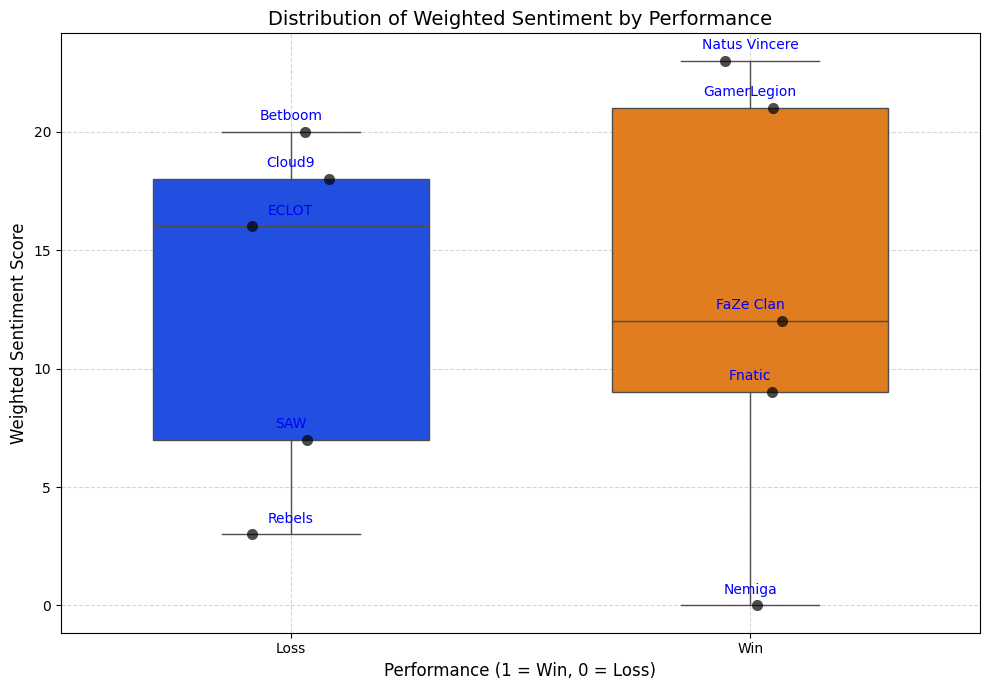

In [26]:
df["weighted_sentiment"] = 2 * df["positive_posts"] - 2 * df["negative_posts"] + df["neutral_posts"]

plt.figure(figsize=(10, 7))
sns.boxplot(x=df["performance"], y=df["weighted_sentiment"], palette="bright", width=0.6)
sns.stripplot(x=df["performance"], y=df["weighted_sentiment"], color="black", size=8, jitter=True, alpha=0.7)

for i in range(df.shape[0]):
    x = df.loc[i, 'performance']
    y = df.loc[i, 'weighted_sentiment']
    plt.text(x, y + 0.5, df.loc[i, 'team'], horizontalalignment='center', fontsize=10, color='blue')

plt.title("Distribution of Weighted Sentiment by Performance", fontsize=14)
plt.xlabel("Performance (1 = Win, 0 = Loss)", fontsize=12)
plt.ylabel("Weighted Sentiment Score", fontsize=12)
plt.xticks([0, 1], labels=["Loss", "Win"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [31]:
weighted_ttest = ttest_ind(
    df.loc[df["performance"] == 1, "weighted_sentiment"],  # Winners
    df.loc[df["performance"] == 0, "weighted_sentiment"],  # Losers
    equal_var=False 
)

print(f"T-Test P-Value for Weighted Sentiment: {weighted_ttest.pvalue}")

correlation = np.corrcoef(df['weighted_sentiment'], df['performance'])[0, 1]
print(f"Correlation between post_count and performance: {correlation}")


T-Test P-Value for Weighted Sentiment: 0.971050786622937
Correlation between post_count and performance: 0.013258122674025694


Created weighted sentiment score to balance the different types of sentiments into a single values, gives more weight to pos and negative posts than neutral posts

# Conclusion

The median for winners is higher, and the box extends to higher values, indicating that teams that win often have a more favorable sentiment mix

The spread of scores for losing teams is narrower, suggesting that losing teams are more clustered in terms of their sentiment scores, with fewer extremes.

Higher weighted sentiment scores tend to perform better

With that said T-Test shows there is no statistical significance

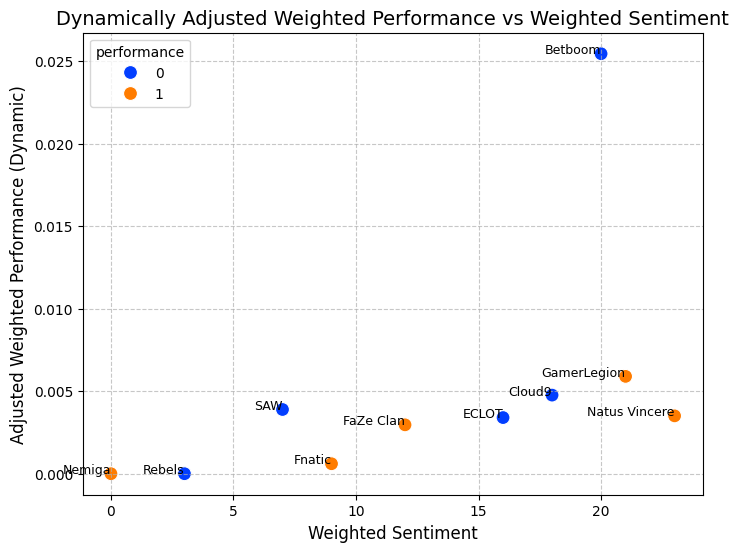

T-Test P-Value for Adjusted Weighted Performance: 0.34827339131531326
Correlation between post_count and performance: 0.5083906452937064


In [28]:
# Dynamic performance modifier based on sentiment ratio
df["performance_modifier_dynamic"] = df["positive_posts"] / (df["positive_posts"] + df["negative_posts"] + 1e-5)

# Adjusted weighted performance calculation using the dynamic modifier
df["adjusted_weighted_performance_dynamic"] = (
    df["weighted_sentiment"] * df["performance_modifier_dynamic"] / (df["time_since_creation_days"] + 1)
)

# Scatter plot for dynamically adjusted weighted performance vs weighted sentiment
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["weighted_sentiment"],
    y=df["adjusted_weighted_performance_dynamic"],
    hue=df["performance"],
    palette="bright",
    s=100
)

for i, row in df.iterrows():
    plt.text(
        row["weighted_sentiment"],
        row["adjusted_weighted_performance_dynamic"],
        row["team"],
        fontsize=9,
        color="black",
        ha="right"
    )

plt.title("Dynamically Adjusted Weighted Performance vs Weighted Sentiment", fontsize=14)
plt.xlabel("Weighted Sentiment", fontsize=12)
plt.ylabel("Adjusted Weighted Performance (Dynamic)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

adjusted_performance_ttest = ttest_ind(
    df.loc[df["performance"] == 1, "adjusted_weighted_performance_dynamic"],  # Winners
    df.loc[df["performance"] == 0, "adjusted_weighted_performance_dynamic"],  # Losers
    equal_var=False
)

print(f"T-Test P-Value for Adjusted Weighted Performance: {adjusted_performance_ttest.pvalue}")

correlation = np.corrcoef(df['weighted_sentiment'], df['adjusted_weighted_performance_dynamic'])[0, 1]
print(f"Correlation between post_count and performance: {correlation}")

### Conclusions

Not statistically significant. However, it is interesting to look at the outliers such as Betboom who is fairly new, got many posts and lost.